<a href="https://colab.research.google.com/github/rakshajp/solar-research/blob/main/generate_dataset_gmaps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install -U googlemaps

  Preparing metadata (setup.py) ... done
  Created wheel for googlemaps: filename=googlemaps-4.10.0-py3-none-any.whl size=40711 sha256=dfc709ad8d376f7d696f65c59ecf423679b72934232e989f7e3251363709c2d9
  Stored in directory: /root/.cache/pip/wheels/17/f8/79/999d5d37118fd35d7219ef57933eb9d09886c4c4503a800f84
Successfully built googlemaps


In [ ]:
from google.colab import files
import io
import pandas as pd

# upload data
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving test_CL_med.csv to test_CL_med.csv
User uploaded file "test_CL_med.csv" with length 166 bytes


In [ ]:
fn = list(uploaded.keys())[0]
print(fn)

test_CL_med.csv


In [ ]:
from IPython.display import Image, display
import pandas as pd
from tqdm import tqdm

import requests
import csv
from io import open as iopen
import googlemaps
from datetime import datetime
import time

In [ ]:
# for _ in tqdm(range(num_rows), desc="Adding Rows"):

In [ ]:
db_df = pd.DataFrame(columns=['Filename', 'Latitude', 'Longitude','Address','URL'])
db_arrays = []
# new_row = {'Filename': filename, 'Latitude': lat, 'Longitude': lng, 'Address': address}

In [ ]:
API_KEY = "<API KEY>"
gmaps = googlemaps.Client(key=API_KEY)

In [ ]:
db_arrays

[]

In [ ]:
def locationreader(uploaded_filename):
  df = pd.read_csv(io.BytesIO(uploaded[uploaded_filename]), names=['id','lat','lng'])
  list_df = df.values.tolist()
  return(list_df)

# defining a function, it takes four parameters:
# the path to a csv file containing lat/lon coordinates
# API key
# the zoom level of images to be downloaded as
# the size, in pixels of images, the maximum is 640

url_list_temp = []

def satellite_squares_colab(uploaded_filename,APIkey,zoom,size,format_value,visual_refresh):
    base = "https://maps.googleapis.com/maps/api/staticmap?scale=1&size="
    # this section reads the csv file
    locations = locationreader(uploaded_filename)

    max_x, max_y = float('-inf'), float('-inf')
    min_x, min_y = float('inf'), float('inf')
    # Initialize a list to store pairs of coordinates
    coordinate_pairs = []

    # print(locations)

    # Iterate through the 'locations' list two elements at a time
    for i in range(0, len(locations), 2):
        if i + 1 < len(locations):
            location1 = locations[i]
            location2 = locations[i + 1]

            # Extract id, lat, and lng from both locations
            id1, lat1, lng1 = location1
            id2, lat2, lng2 = location2

            temp_lat = min(lat1, lat2)
            temp_lng = min(lng1, lng2)

            min_x = min(min_x, temp_lat)
            min_y = min(min_y, temp_lng)

            temp_lat = max(lat1, lat2)
            temp_lng = max(lng1, lng2)

            max_x = max(max_x, temp_lat)
            max_y = max(max_y, temp_lng)

            # Create a pair of coordinates as a list of lists
            coordinate_pair = [[id1, lat1, lng1], [id2, lat2, lng2]]

            # Append the coordinate pair to the list
            coordinate_pairs.append(coordinate_pair)

    print('coordinates: min_x = {}, max_x = {}, min_y = {}, max_y = {} '.format(min_x, max_x, min_y, max_y))

    count = 0
    y = min_y
    y_offset = 0.0
    while(y <= max_y ):
      y = min_y + y_offset*(0.0002)
      x = min_x
      x_offset = 0.0

      print(x,max_x,y)

      while(x <= max_x ):
        x = min_x + x_offset*(0.0002)
        lat, lng = x, y

        latlng = "center={},{}".format(lat, lng)
        view = "zoom={}&maptype=satellite".format(zoom)
        format_value = "&format_value={}".format(format_value)
        visual_refresh = "&visual_refresh={}".format(visual_refresh)
        keys = "key={}".format(API_KEY)
        url = "{}{}x{}&{}&{}&{}".format(base,size,size, latlng, view, keys)

        # defining the name for the image files that will be downloaded and for lookup for metadata
        filename = "{}_{}_{}.png".format(int(x_offset),int(y_offset),zoom)

        # print(url)
        url_list_temp.append(url)
        res = requests.get(url)

        if res.status_code == requests.codes.ok:
            with iopen(filename, 'wb') as file:
                file.write(res.content)
            display(Image(filename=filename))

            # rev geocode address
            address_response = gmaps.reverse_geocode((lat, lng))
            address = address_response[0]['formatted_address']

            # Create a new row as a dictionary
            new_row = {'Filename': filename, 'Latitude': lat, 'Longitude': lng, 'Address': address, 'URL': url}

            # Append the new row to the main array
            global db_arrays
            db_arrays.append(new_row)


            # files.download(filename)

        #here we tell the function to show us an error message if it is unable to download an image
        else:
            print(res.status_code)
            print(url)
            return False
        x_offset+=1
        count+=1
      y_offset+=1

    print('Total count of image tiles is {}'.format(count))



coordinates: min_x = 41.88897818201133, max_x = 41.89583459689308, min_y = -87.68681943460764, max_y = -87.66693941532345 
41.88897818201133 41.89583459689308 -87.68681943460764


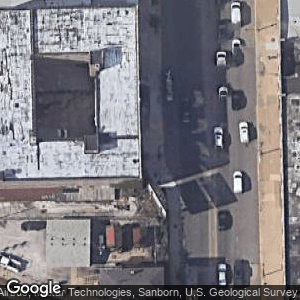

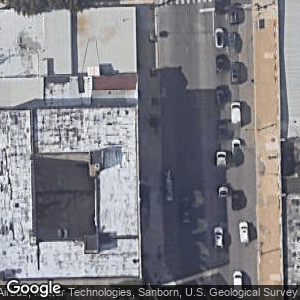

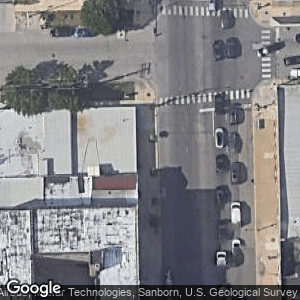

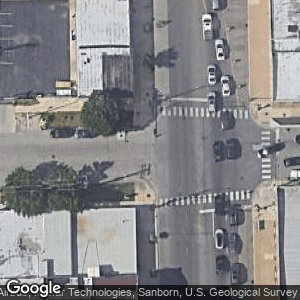

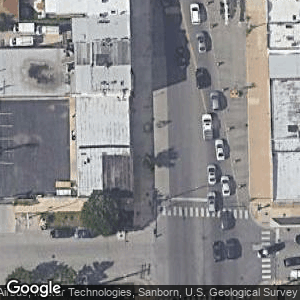

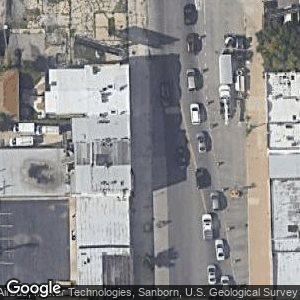

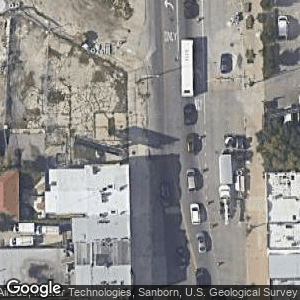

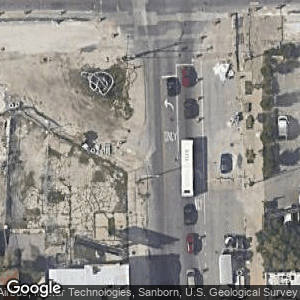

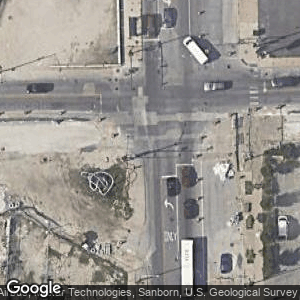

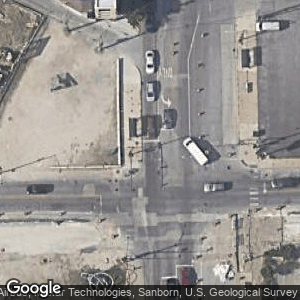

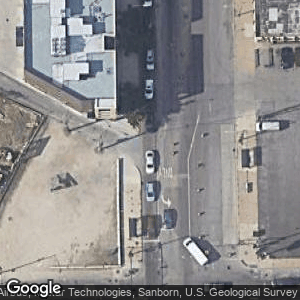

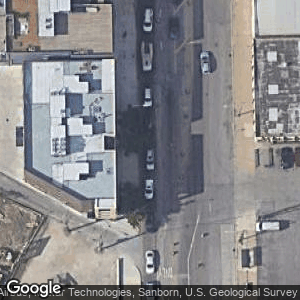

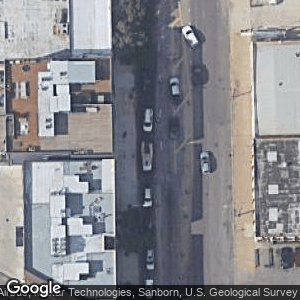

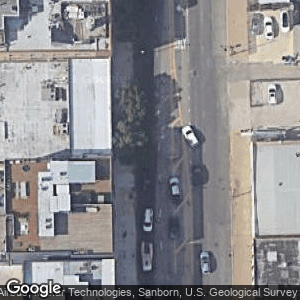

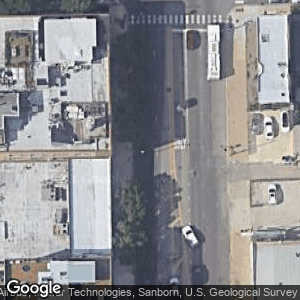

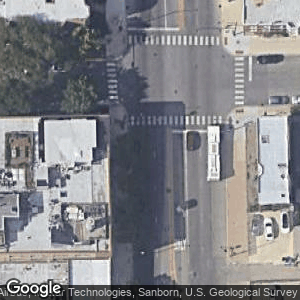

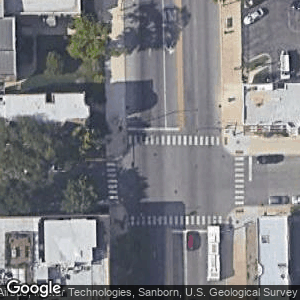

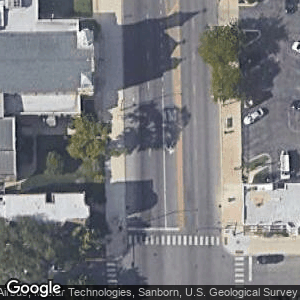

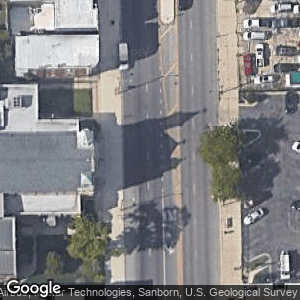

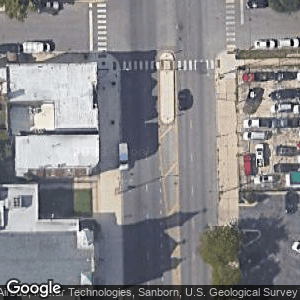

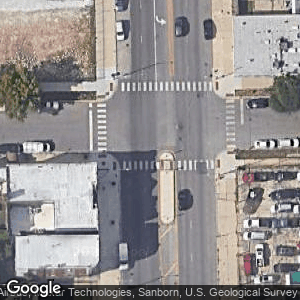

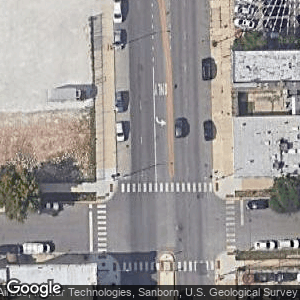

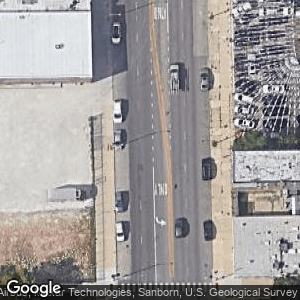

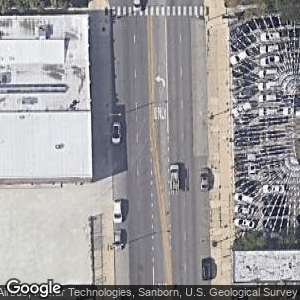

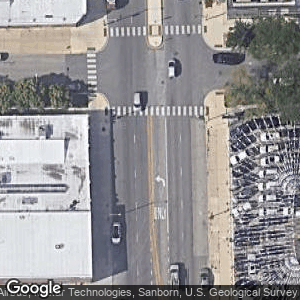

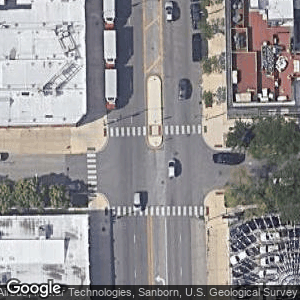

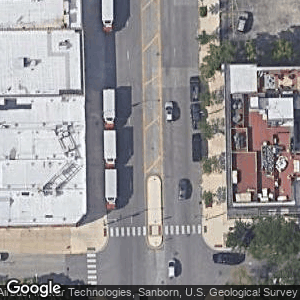

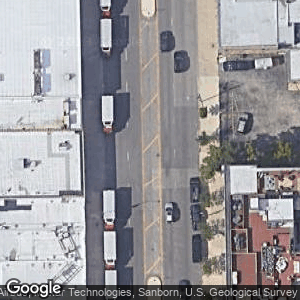

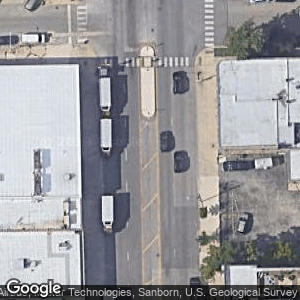

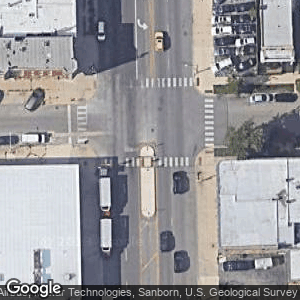

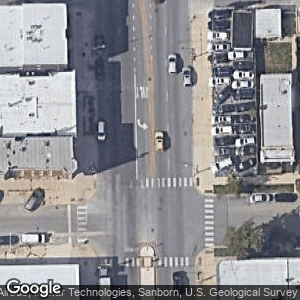

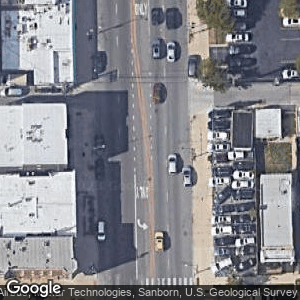

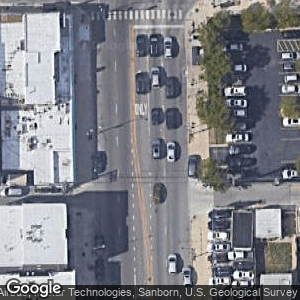

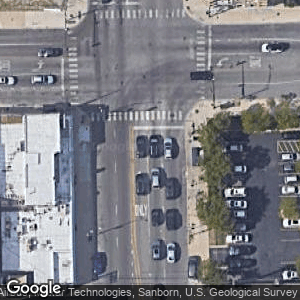

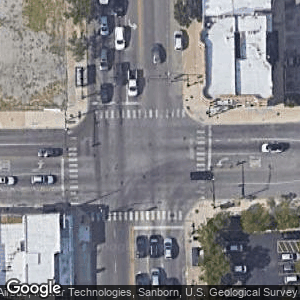

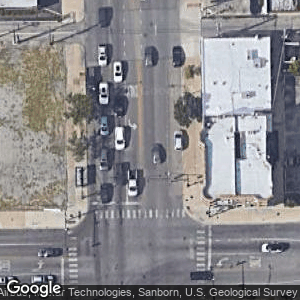

41.88897818201133 41.89583459689308 -87.68661943460764


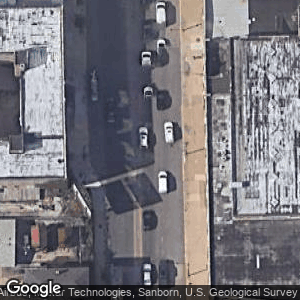

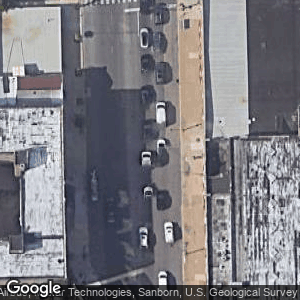

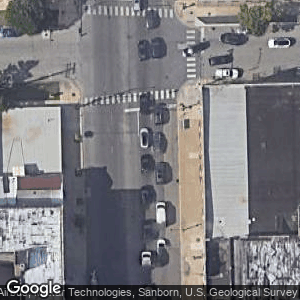

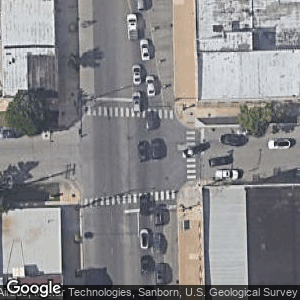

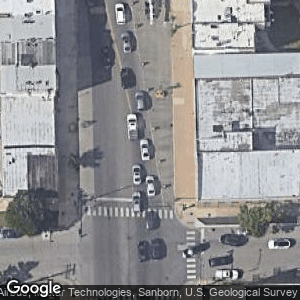

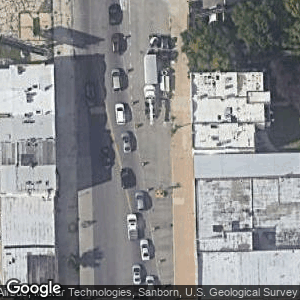

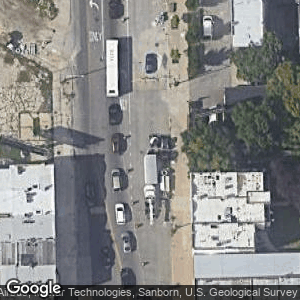

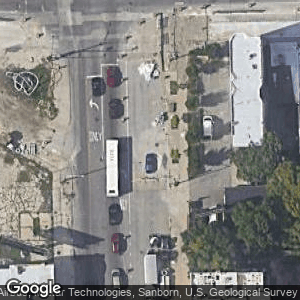

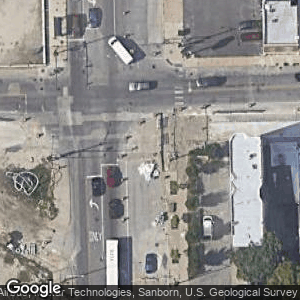

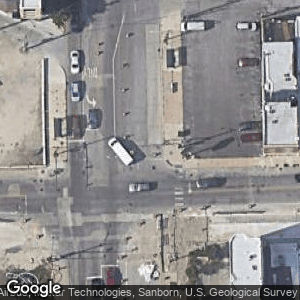

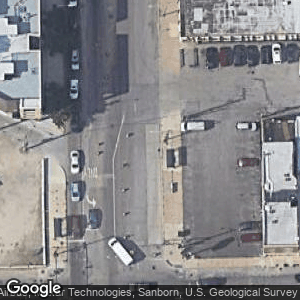

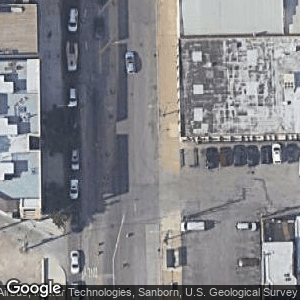

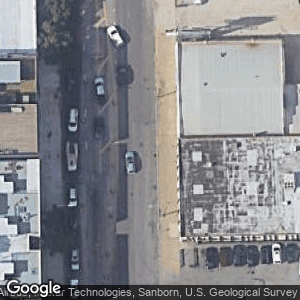

KeyboardInterrupt: ignored

In [ ]:
satellite_squares_colab(fn,"yourkey",19,300,"png","true")

In [ ]:
print(len(url_list_temp))

In [ ]:
len(db_arrays)

In [ ]:

db_df = pd.DataFrame.from_records(db_arrays)


In [ ]:
db_df.to_csv('arco_dg_office_metadata.csv')